In [ ]:
!pip install transformers
!pip install datasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import datasets
from datasets import load_dataset
import pandas as pd
# split train, eval dataset

dataset = load_dataset('csv', data_files={'train': 'Train_classifier.csv', 'test': 'Eval_classifier.csv'})
dataset

  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'Unnamed: 0.1', 'responses', 'label'],
        num_rows: 158
    })
    test: Dataset({
        features: ['Unnamed: 0', 'Unnamed: 0.1', 'responses', 'label'],
        num_rows: 40
    })
})

In [ ]:
from transformers import AutoTokenizer
#tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
def tokenize_function(examples):
    return tokenizer(examples["responses"], padding="max_length", truncation=True)
tokenized_datasets = dataset.map(tokenize_function, batched=True)


  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
from transformers import AutoModelForSequenceClassification
#checkpoint = "distilbert-base-cased"
checkpoint = "distilbert-base-uncased"

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=6)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifi

In [ ]:
import numpy as np
from datasets import load_metric
metric = load_metric("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

<ipython-input-5-db86d8f7dcde>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
from transformers import TrainingArguments, Trainer
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", num_train_epochs=6,
                                  logging_steps = 20)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
    
)
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: responses, Unnamed: 0.1, Unnamed: 0. If responses, Unnamed: 0.1, Unnamed: 0 are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 158
  Num Epochs = 6
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 120
  Number of trainable parameters = 66958086


Epoch,Training Loss,Validation Loss,Accuracy
1,1.711200,1.423829,0.450000
2,1.307200,0.995110,0.800000
3,0.830200,0.812329,0.875000
4,0.520700,0.647439,0.850000
5,0.341400,0.654579,0.850000
6,0.262900,0.645703,0.850000


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: responses, Unnamed: 0.1, Unnamed: 0. If responses, Unnamed: 0.1, Unnamed: 0 are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 40
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: responses, Unnamed: 0.1, Unnamed: 0. If responses, Unnamed: 0.1, Unnamed: 0 are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 40
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: responses, Unnamed: 0.1, Unnamed: 0. If response

TrainOutput(global_step=120, training_loss=0.82891765832901, metrics={'train_runtime': 50.7817, 'train_samples_per_second': 18.668, 'train_steps_per_second': 2.363, 'total_flos': 125588052025344.0, 'train_loss': 0.82891765832901, 'epoch': 6.0})

[1.7112, 1.3072, 0.8302, 0.5207, 0.3414, 0.2629] 6
[1.4238293170928955, 0.9951096773147583, 0.8123294115066528, 0.6474388837814331, 0.654578685760498, 0.6457030177116394] 6
[{'loss': 1.7112, 'learning_rate': 4.166666666666667e-05, 'epoch': 1.0, 'step': 20}, {'eval_loss': 1.4238293170928955, 'eval_accuracy': 0.45, 'eval_runtime': 0.7485, 'eval_samples_per_second': 53.44, 'eval_steps_per_second': 6.68, 'epoch': 1.0, 'step': 20}, {'loss': 1.3072, 'learning_rate': 3.3333333333333335e-05, 'epoch': 2.0, 'step': 40}, {'eval_loss': 0.9951096773147583, 'eval_accuracy': 0.8, 'eval_runtime': 0.6752, 'eval_samples_per_second': 59.242, 'eval_steps_per_second': 7.405, 'epoch': 2.0, 'step': 40}, {'loss': 0.8302, 'learning_rate': 2.5e-05, 'epoch': 3.0, 'step': 60}, {'eval_loss': 0.8123294115066528, 'eval_accuracy': 0.875, 'eval_runtime': 0.7015, 'eval_samples_per_second': 57.021, 'eval_steps_per_second': 7.128, 'epoch': 3.0, 'step': 60}, {'loss': 0.5207, 'learning_rate': 1.6666666666666667e-05, 'epoch

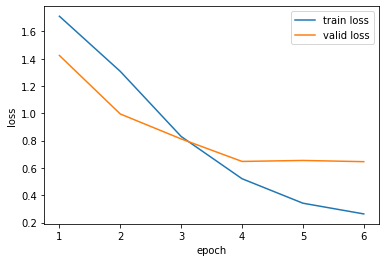

<Figure size 144x144 with 0 Axes>

In [ ]:
# training graph
import matplotlib.pyplot as plt

train_loss_list = []
eval_loss_list =[]
epoch_list = [1,2,3,4,5,6]
# get training loss
for data in trainer.state.log_history:
  if 'loss' in data.keys():
    train_loss_list.append(data['loss'])
  elif 'eval_loss' in data.keys():
    eval_loss_list.append(data['eval_loss'])
  else:
    pass

print(train_loss_list, len(train_loss_list))
print(eval_loss_list, len(eval_loss_list))
print(trainer.state.log_history)

plt.plot(epoch_list,train_loss_list,label = "train loss")
plt.plot(epoch_list,eval_loss_list,label = "valid loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.figure(figsize=(2, 2))
plt.show()

In [ ]:
model.save_pretrained("Saved_Model_Classifier")
# load the model
from transformers import AutoModelForSequenceClassification
load_model = AutoModelForSequenceClassification.from_pretrained("Saved_Model_Classifier")
load_tokenizer = tokenizer

Configuration saved in Saved_Model_Classifier/config.json
Model weights saved in Saved_Model_Classifier/pytorch_model.bin
loading configuration file Saved_Model_Classifier/config.json
Model config DistilBertConfig {
  "_name_or_path": "Saved_Model_Classifier",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_"

In [ ]:
# test model
from transformers import pipeline
my_pipeline  = pipeline("text-classification", model=load_model, tokenizer=load_tokenizer)
data = ["When applying restraint to patients, use safe and trauma-aware strategies"]
my_pipeline(data)[0]['label']



Disabling tokenizer parallelism, we're using DataLoader multithreading already


'LABEL_2'

In [ ]:
from sklearn.metrics import classification_report
predictions =[]
labels =[]

test_data = pd.read_csv("Test_classifier.csv")
for response in test_data['responses']:
  data = [response]
  prediction = my_pipeline(data)
  prediction = prediction[0]['label']
  predictions.append(prediction)

for label in test_data['label']:
  labels.append(label)


for i in range (len(predictions)):
  if (predictions[i] == 'LABEL_1'):
    predictions[i] = 1
  elif (predictions[i] == 'LABEL_2'):
    predictions[i] = 2
  elif (predictions[i] == 'LABEL_3'):
    predictions[i] = 3
  elif (predictions[i] == 'LABEL_4'):
    predictions[i] = 4
  elif (predictions[i] == 'LABEL_0'):
    predictions[i] = 0
  else:
    predictions[i] = 5

print(predictions)
print(labels)

print(classification_report(predictions, labels))

 



[1, 0, 2, 0, 0, 1, 4, 0, 5, 0, 4, 5, 0, 5, 2, 0, 0, 0, 2, 4, 1, 0]
[1, 0, 2, 3, 2, 4, 4, 0, 5, 0, 4, 5, 0, 0, 2, 0, 4, 0, 2, 4, 0, 4]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       1.00      0.33      0.50         3
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         0
           4       0.50      1.00      0.67         3
           5       1.00      0.67      0.80         3

    accuracy                           0.68        22
   macro avg       0.67      0.60      0.58        22
weighted avg       0.78      0.68      0.69        22



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
